In [1]:
import xarray as xr
import numpy as np
from scipy.special import lambertw

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from numba import vectorize
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
WBT_matrix = pd.read_csv('/home/581/cg8052/rhversion_WBT_matrix.csv', header=0, index_col=0)

In [4]:
temperature = np.arange(25,60,0.1)
humidity =  np.arange(0.5, 100.5, 0.5)
xx_temp, yy_humidity = np.meshgrid(temperature, humidity)
xx = xx_temp
yy = yy_humidity

In [5]:
survivable = xr.open_dataset('/home/581/cg8052/Survivable_Day-Outdoors_6H-65_over.nc')
Survive1 = survivable['__xarray_dataarray_variable__']

survivable2 = xr.open_dataset('/home/581/cg8052/Survivable_Day-Outdoors_6H-Young_adult.nc')
Survive2 = survivable2['__xarray_dataarray_variable__']

survivable3 = xr.open_dataset('/home/581/cg8052/Survivable_Night-Indoors_6H-65_over.nc')
Survive3 = survivable3['__xarray_dataarray_variable__']

survivable4 = xr.open_dataset('/home/581/cg8052/Survivable_Night-Indoors_6H-Young_adult.nc')
Survive4 = survivable4['__xarray_dataarray_variable__']

In [6]:
ds = xr.open_dataset("/scratch/w97/cg8052/Eur_2022_T_ERA5.nc")

ds2 = xr.open_dataset("/scratch/w97/cg8052/Eur_2022_RH_ERA5.nc")

In [7]:
RH1 = ds2['__xarray_dataarray_variable__']
T1 = ds['t2m']

In [170]:
RH1_b = ds2['__xarray_dataarray_variable__'].sel(latitude=slice(30,26.5), longitude=slice(67,68))
Td1_bb = ds['t2m'].sel(latitude=slice(30,26.5), longitude=slice(67,68))
Td1_b = Td1_fb.resample(time='6H').mean()

In [62]:
RH1 = ds2['__xarray_dataarray_variable__'].sel(latitude=46.2, longitude=45.3, method='nearest')
Td1b = ds['t2m'].sel(latitude=46.2, longitude=45.3, method='nearest')

ds_rolling_mean2 = Td1b.rolling(time=6, center=True).mean()
Td1 = ds_rolling_mean2.coarsen(time=6, boundary='trim').mean()


In [8]:
RH1 = ds2['__xarray_dataarray_variable__'].sel(latitude=slice(30,26.5), longitude=slice(67,68))
Td1b = ds['t2m'].sel(latitude=slice(30,26.5), longitude=slice(67,68))
Td1 = Td1b.resample(time='6H').mean()

In [18]:
lat = T1['latitude']
lon = T1['longitude']
Td = np.nanmax(RH1*100, axis=0)

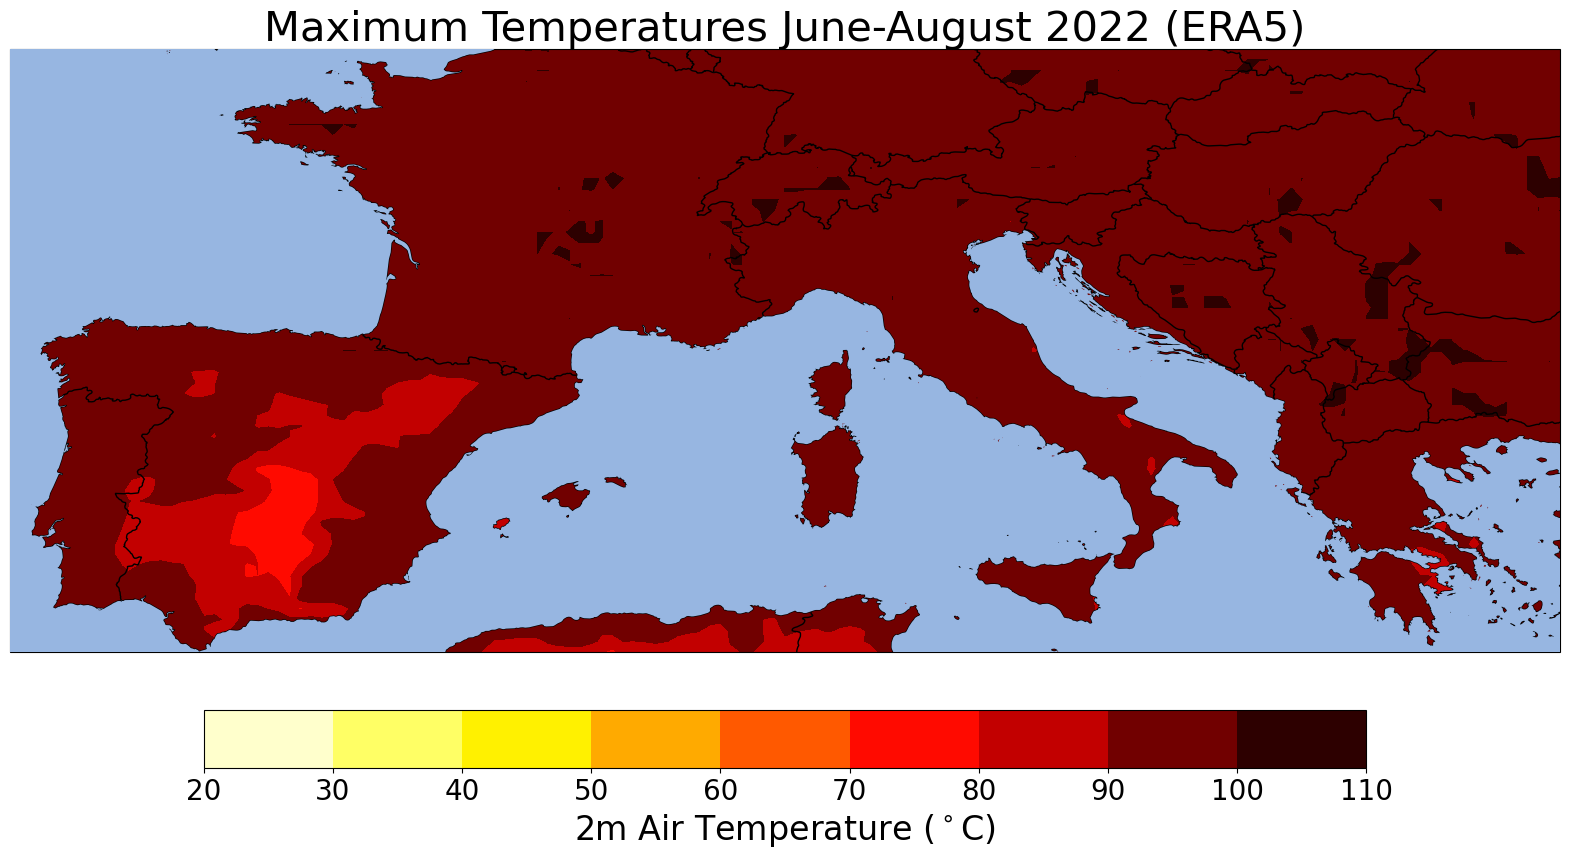

In [19]:
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-120, -85, 12, 35], crs=ccrs.PlateCarree())
cmap = plt.get_cmap('hot_r')

# Add coastlines and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=100)


uneven_levels = np.arange(15,45,0.5)
colors = cmap(np.linspace(0, 1, len(uneven_levels) - 1))
cmap, norm = mcolors.from_levels_and_colors(uneven_levels, colors)
cmap.set_under("lightyellow")
cmap.set_under("black")
#cmap.set_over("maroon")

# Plot the data using contourf
contour = ax.contourf(lon,lat, Td,extent='both', transform=ccrs.PlateCarree(), cmap=cmap)#, levels=uneven_levels)

# Add a color bar
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, shrink=0.75)
cbar.set_label('2m Air Temperature ($^\circ$C)', fontsize=24)
cbar.ax.tick_params(labelsize=20)
ax.set_extent([ -10,26,36, 50], crs=ccrs.PlateCarree())
#lon1, lat1 = 34.3, 31.2
#ax.plot(lon1, lat1, marker='o', color='limegreen', markersize=20, transform=ccrs.PlateCarree())
#ax.text(lon1 + 0.5, lat1, 'Mexicali', transform=ccrs.PlateCarree(),zorder=100, fontsize=30, color='black')

# Add a title
ax.set_title('Maximum Temperatures June-August 2022 (ERA5)', fontsize=30)

# Show the plot
plt.show()

In [60]:
TT2 = Td1.resample(time='D').max()
#tt2 = np.nanmax(TT2, axis=(1,2))-273.15
tt2 = TT2 -273.15

In [63]:
#T_1b = Td1.max(dim=('latitude','longitude'))-273.15
T_1b = Td1 -273.15
T_1b

<xarray.DataArray 't2m' (time: 124)> Size: 992B
array([-2.89516527e-01,  7.12225534e-02, -1.46280560e-01, -1.23515467e+00,
       -9.56154740e-01,  5.23840576e-02,  5.05051375e-01, -5.25993991e-01,
       -1.68256895e+00, -1.68981452e+00, -8.22972009e-01, -4.02411647e-01,
       -3.11841956e-01,  2.21645626e+00,  4.09921901e+00,  3.64224963e+00,
        2.09409661e+00,  1.27706742e+00, -3.21668768e-01, -1.38627020e+00,
       -1.24946469e+00, -1.07783512e+00, -1.59403708e+00, -2.70890469e+00,
       -3.66989440e+00, -4.40473159e+00, -5.29897144e+00, -7.21678465e+00,
       -8.07008700e+00, -6.16246288e+00, -5.24064456e+00, -6.98044304e+00,
       -7.20587101e+00, -6.36918820e+00, -5.88020243e+00, -7.07744318e+00,
       -7.71419340e+00, -7.12331673e+00, -6.75374711e+00, -7.55012640e+00,
       -7.00919892e+00, -4.78204493e+00, -2.46472880e+00, -2.59175681e-01,
        1.69762378e-01,  7.42660960e-01,  1.72081363e+00, -4.82429970e-01,
       -7.36840233e-01,  5.80269504e-01,  1.15737958e+00,  8.19101780e-01,
       -7.75513491e-01,  2.95835388e-01,  5.98428727e-01, -2.25212046e-01,
        1.69943517e-01,  2.33541955e+00,  3.06101863e+00,  2.44768068e+00,
        2.97837379e+00,  3.21154546e+00,  2.49568262e+00, -1.09418696e-01,
       -1.65861327e+00, -1.17782406e+00, -2.11096359e+00, -4.12496182e+00,
       -5.43772421e+00, -8.33387524e-01, -1.18791478e-03, -1.88775459e+00,
       -8.68845558e-01,  2.87005244e+00,  4.23285459e+00,  3.09031793e+00,
        2.46298696e+00,  1.19292818e+00, -8.96152320e-01, -3.16795717e+00,
       -2.36446816e+00,  5.01836151e-01,  2.13136604e+00,  1.57667196e+00,
        8.16022410e-01, -1.50265226e+00, -3.84505618e+00, -7.09288532e+00,
       -8.69139508e+00, -5.88192326e+00, -3.42567323e+00, -3.72296824e+00,
       -3.31753302e+00, -5.87173818e-01,  1.49932545e+00,  1.20289085e+00,
        7.19429834e-01,  1.70451108e+00,  1.58405339e+00, -1.71730243e+00,
       -3.64847467e+00, -3.37853170e+00, -2.35196954e+00, -2.46038146e+00,
       -1.99621179e+00, -5.79430109e-01,  4.97307666e-01,  5.65280220e-01,
        1.33172222e-01,  1.80286977e+00,  2.74090006e+00,  2.14748744e+00,
        8.84674236e-01,  8.05335187e-01,  1.60429572e+00,  1.79675749e-02,
       -2.44412821e-01, -6.61803243e-01, -7.57716546e-01, -2.20764674e+00,
       -4.67648595e+00, -3.28664875e+00, -2.70795371e+00, -3.80106196e+00])
Coordinates:
    longitude  float32 4B 45.25
    latitude   float32 4B 46.25
  * time       (time) datetime64[ns] 992B 2019-01-01T02:30:00 ... 2019-01-31T...

In [62]:
matching_times = T_1b.time.where(T_1b.isin(tt2), drop=True)

In [55]:
#RH_1b = RH1.max(dim=('latitude','longitude'))*100
RH_1b = RH1*100

In [18]:
RH_1b = RH1.max(dim=('latitude','longitude'))*100
RH_1bb = RH_1b.sel(time=matching_times)
RH_1bb

<xarray.DataArray '__xarray_dataarray_variable__' (time: 30)> Size: 240B
array([29.50781411, 45.88024656, 43.25079751, 63.07133333, 61.30189484,
       45.09714561, 37.55114433, 51.25719615, 39.89773182, 51.37694768,
       52.25983543, 39.52463074, 53.74840329, 53.18248496, 59.03766381,
       65.84252187, 61.07778715, 42.3899442 , 35.30250299, 30.23331088,
       45.91946778, 59.53692802, 62.92335508, 65.04019273, 75.87477598,
       66.29814741, 63.6038722 , 71.72724513, 46.7076993 , 65.97676864])
Coordinates:
  * time     (time) datetime64[ns] 240B 2015-06-01T06:00:00 ... 2015-06-30T06...

In [75]:
temperature = tt2

In [56]:
df = pd.DataFrame({'Temp':T_1b, 'RH':RH_1b, 'time':RH_1b['time']})


In [57]:
def find_first_humidity_for_temperatures(data, temperatures):
    results = []
    for temperature in temperatures:
        # Select the data for the given temperature
        temp_data = data.sel(temperature=temperature, method='nearest')
        
        # Find the index of the first occurrence of 1
        indices = np.where(temp_data.values == 1)[0]
        if indices.size > 0:
            first_humidity = temp_data.humidity[indices[0]].values.item()
        else:
            first_humidity = np.nan  # or some other value indicating no occurrence
        
        results.append(first_humidity)
    
    return results

In [58]:
result = find_first_humidity_for_temperatures(Survive1, T_1b)
result
df['Outdoors_65'] = result

result = find_first_humidity_for_temperatures(Survive2, T_1b)
result
df['Outdoors_YA'] = result

result = find_first_humidity_for_temperatures(Survive3, T_1b)
result
df['Indoors_65'] = result

result = find_first_humidity_for_temperatures(Survive4, T_1b)
result
df['Indoors_YA'] = result

In [59]:
df

,Temp,RH,time,Outdoors_65,Outdoors_YA,Indoors_65,Indoors_YA
0,22.567265,68.294711,2010-07-01 00:00:00,NaN,NaN,NaN,NaN
1,31.037092,35.555493,2010-07-01 06:00:00,NaN,NaN,NaN,NaN
2,32.116888,30.624500,2010-07-01 12:00:00,96.0,NaN,NaN,NaN
3,24.488066,46.020388,2010-07-01 18:00:00,NaN,NaN,NaN,NaN
4,22.882389,50.639672,2010-07-02 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
119,24.949436,44.634935,2010-07-30 18:00:00,NaN,NaN,NaN,NaN
120,23.453529,51.324186,2010-07-31 00:00:00,NaN,NaN,NaN,NaN
121,36.340149,17.255136,2010-07-31 06:00:00,62.5,70.5,80.0,84.0
122,37.392587,15.634316,2010-07-31 12:00:00,55.5,64.0,72.0,76.5


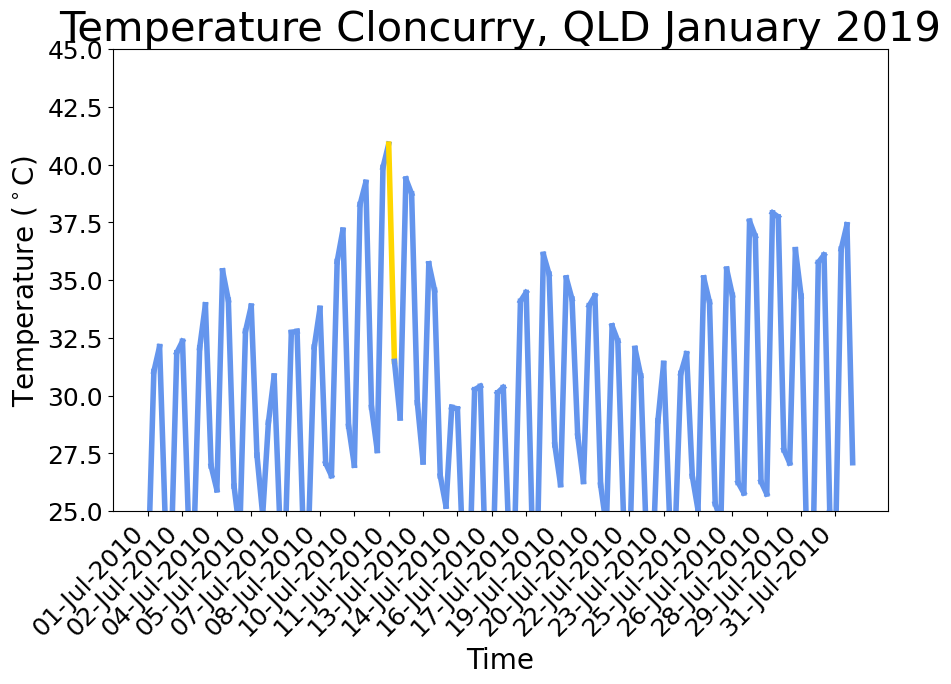

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the data to plot the segments with the correct color
for i in range(len(df) - 1):
    x_values = df['time'].iloc[i:i+2]
    y_values = df['Temp'].iloc[i:i+2]
    RH_value = df['RH'].iloc[i]
    
    if RH_value > df['Indoors_YA'].iloc[i]:
        color = 'magenta'
    elif RH_value > df['Outdoors_YA'].iloc[i]:
        color = 'crimson'
    elif RH_value > df['Indoors_65'].iloc[i]:
        color = 'orange'
    elif RH_value > df['Outdoors_65'].iloc[i]:
        color = 'gold'
    else:
        color = 'cornflowerblue'
    
    ax.plot(x_values, y_values, color=color, linewidth=4)

# Set labels and title
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize=20)
ax.set_title('Temperature Cloncurry, QLD January 2019', fontsize=30)

# Adjust x-ticks: angle them and show every third label
ax.set_xticks(df['time'][::6])
df['time'] = pd.to_datetime(df['time'])
ax.set_xticklabels(df['time'][::6].dt.strftime('%d-%b-%Y'), rotation=45, ha='right', fontsize=18)

ax.tick_params(axis='y', labelsize=18)
plt.ylim(25,45)

# Show the plot
plt.show()

In [37]:
hurs2 = df['RH']
tas2 = df['Temp']

In [38]:
hurs = hurs2.values.flatten().tolist()
tas = tas2.values.flatten().tolist()

In [39]:
df =pd.DataFrame({'hurs':hurs, 'tas':tas})


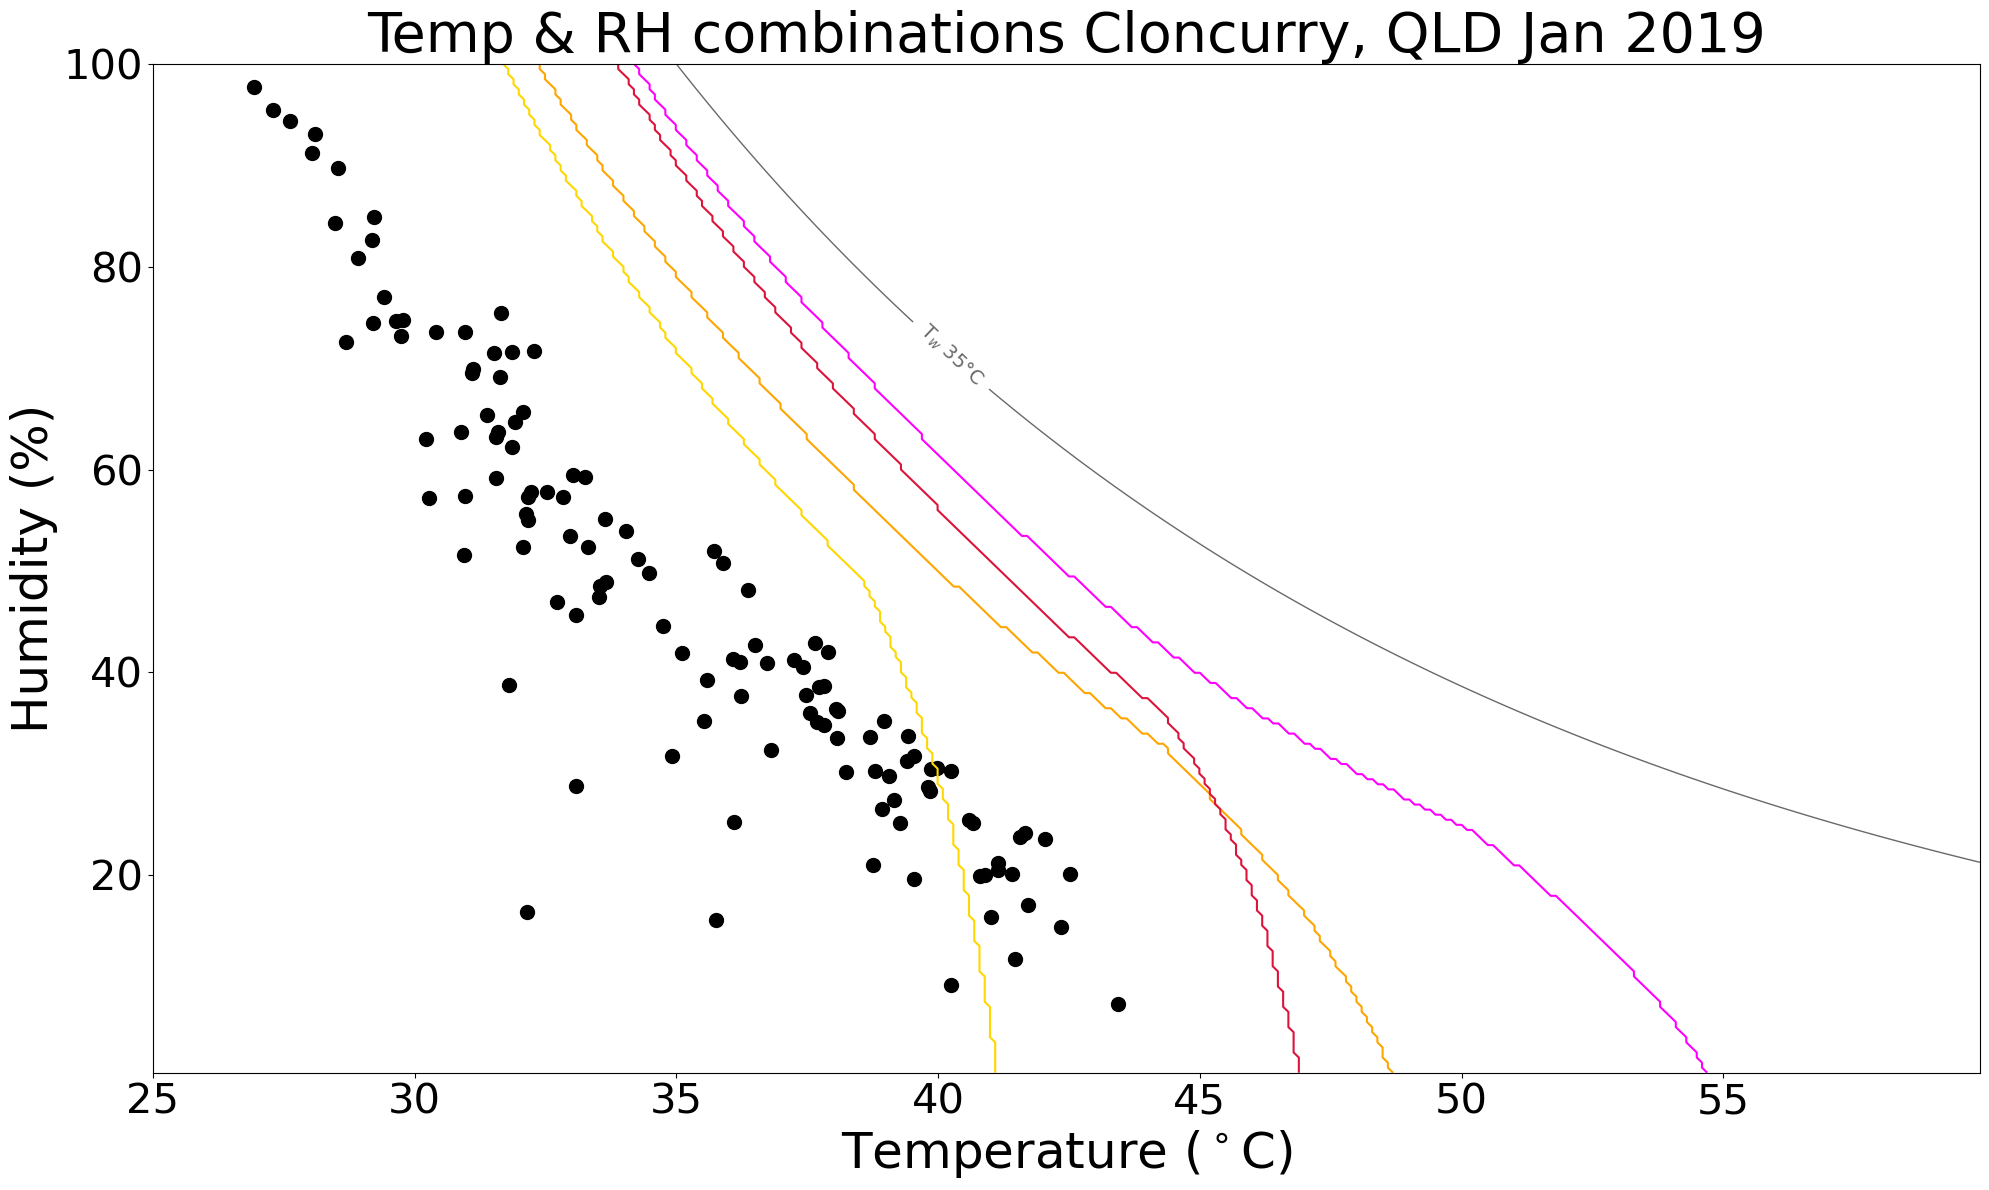

In [40]:

fig, ax = plt.subplots(figsize=(20, 12))  # Create a single subplot

# Plot the contour plots on the current axis
Survive1.plot.contour(ax=ax, levels=[0.9, 1.1], colors=['gold', 'white'], label='65+ inside')
Survive2.plot.contour(ax=ax, levels=[0.9, 1.1], colors=['orange', 'white'], label='YA inside')
Survive3.plot.contour(ax=ax, levels=[0.9, 1.1], colors=['crimson', 'white'], label='65+ outside')#, linestyles=['dashed', 'dashed'])
Survive4.plot.contour(ax=ax, levels=[0.9, 1.1], colors=['magenta', 'white'], label='YA outside')#, linestyles=['dashed', 'dashed'])

# Add the additional contour plot with custom formatting
cp = ax.contour(xx, yy, WBT_matrix, colors='Dimgrey', levels=[35], linewidths=(1,))
ax.clabel(cp, fmt='T$_w$ %2.1d°C', colors='Dimgrey', manual=[(40, 70)], fontsize=14)

# Plot the scatter plot on the current axis
plt.scatter(tas, hurs,color='k', s=100)

plt.xticks(fontsize=30)  # Adjust the fontsize as needed
plt.yticks(fontsize=30)

# Set title and labels
ax.set_xlabel('Temperature ($^\circ$C)', fontsize=36)
ax.set_ylabel('Humidity (%)', fontsize=36)
ax.set_title('Temp & RH combinations Cloncurry, QLD Jan 2019', fontsize=40)

plt.tight_layout()
plt.show()

In [8]:
Survive=survivable['__xarray_dataarray_variable__']

In [141]:
Survive.sel(temperature=45, humidity=80, method='nearest')

<xarray.DataArray '__xarray_dataarray_variable__' ()> Size: 4B
array(1, dtype=int32)
Coordinates:
    humidity     float64 8B 80.0
    temperature  float64 8B 45.0

In [33]:
temp_data = T1 -271.15
hum_data = RH1*100

In [34]:
np.nanmax(temp_data)

51.10340579378885

In [35]:
ds = xr.Dataset({'tas': temp_data, 'hurs': hum_data})
result = Survive1.sel(humidity=ds['hurs'], temperature=ds['tas'], method='nearest')

In [36]:
result3 = result.resample(time='1D').max()


In [40]:
result2 = result3.resample(time='M').sum()

In [38]:
result2 = result3.sum(dim='time')
lon = result3['longitude']
lat = result3['latitude']

In [41]:
result2[0,:,:]

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 173, longitude: 225)> Size: 311kB
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ..., 30., 30., 30.],
       [ 1.,  1.,  1., ..., 30., 30., 30.],
       [ 1.,  2.,  3., ..., 30., 30., 30.]])
Coordinates:
  * longitude  (longitude) float32 900B -13.0 -12.75 -12.5 ... 42.5 42.75 43.0
  * latitude   (latitude) float32 692B 68.0 67.75 67.5 67.25 ... 25.5 25.25 25.0
    time       datetime64[ns] 8B 2022-06-30

In [48]:

Result = result2.sel(longitude=slice(-13,8), latitude=slice(51,36))
#Result.to_netcdf("/scratch/w97/cg8052/SEA_Apr_2024_Survive1.nc")

In [ ]:
Result1 = Result[1,:,:]/30
Result1.to_netcdf("/scratch/w97/cg8052/EurApr_2024_Survive1.nc")

In [49]:
lon = Result['longitude']
lat = Result['latitude']

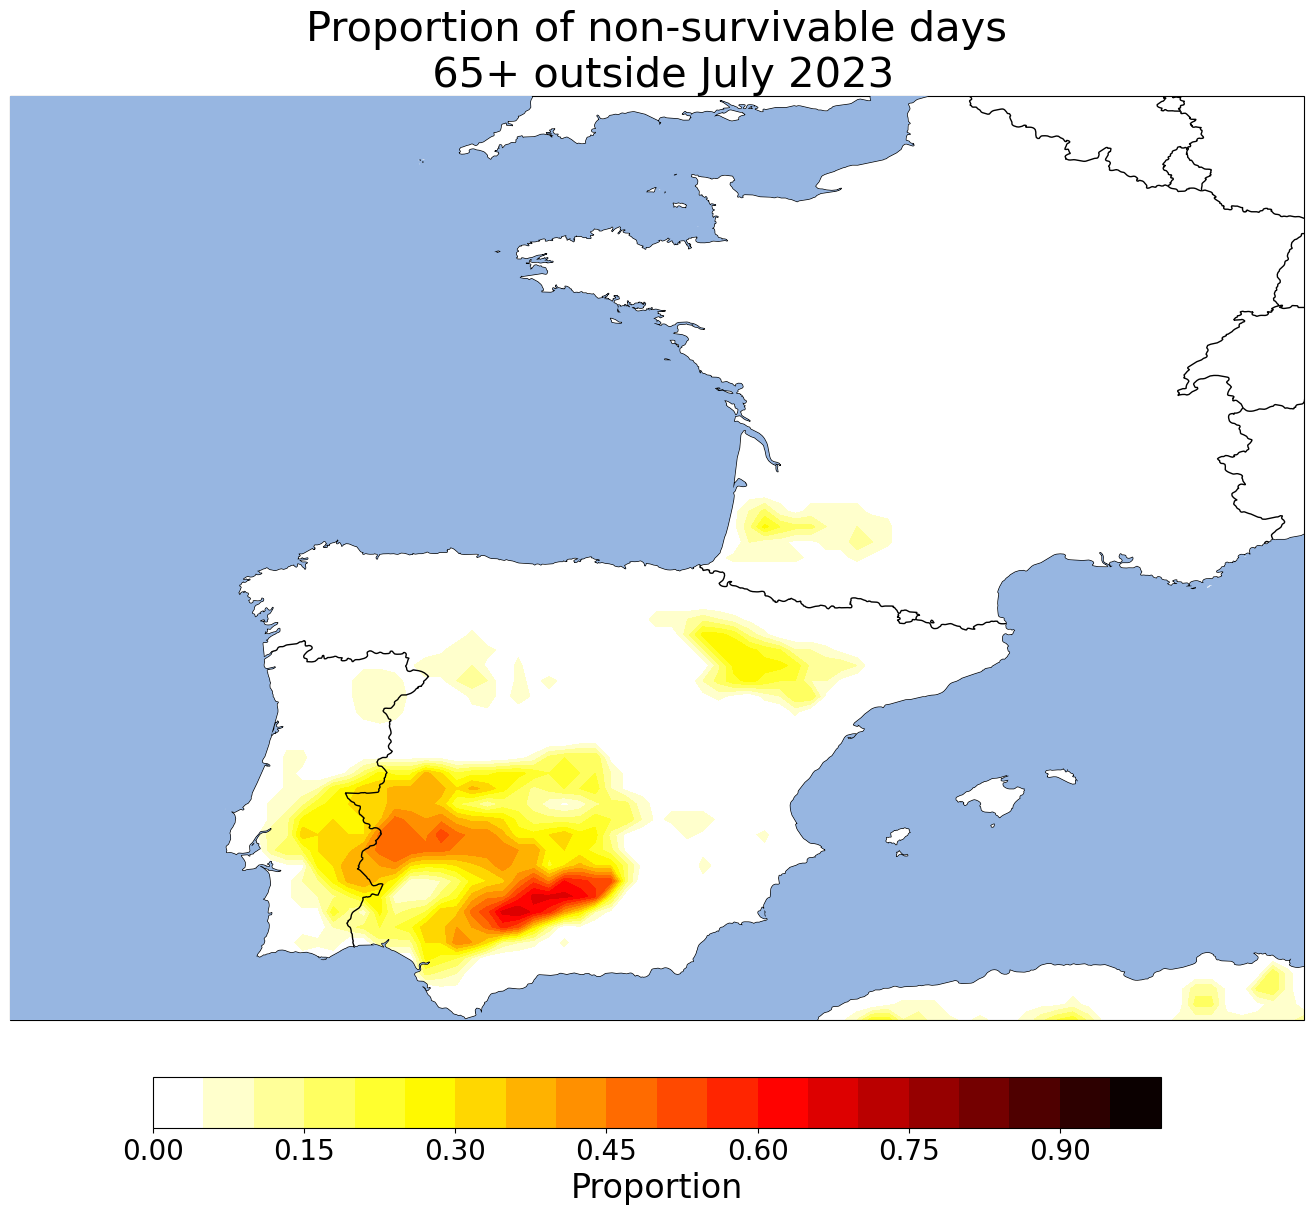

In [50]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('hot_r')

# Add coastlines and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=100)

uneven_levels = np.arange(0,1.05,0.05)
colors = cmap(np.linspace(0, 1, len(uneven_levels) - 1))
cmap, norm = mcolors.from_levels_and_colors(uneven_levels, colors)
cmap.set_under("lightyellow")
#cmap.set_over("maroon")

# Plot the data using contourf
contour = ax.contourf(lon,lat, Result[1,:,:]/30, transform=ccrs.PlateCarree(), cmap=cmap, levels=uneven_levels)

# Add a color bar
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, shrink=0.65)
cbar.set_label('Proportion', fontsize=24)
cbar.ax.tick_params(labelsize=20)


# Add a title
ax.set_title('Proportion of non-survivable days\n 65+ outside July 2023', fontsize=30)

# Show the plot
plt.show()

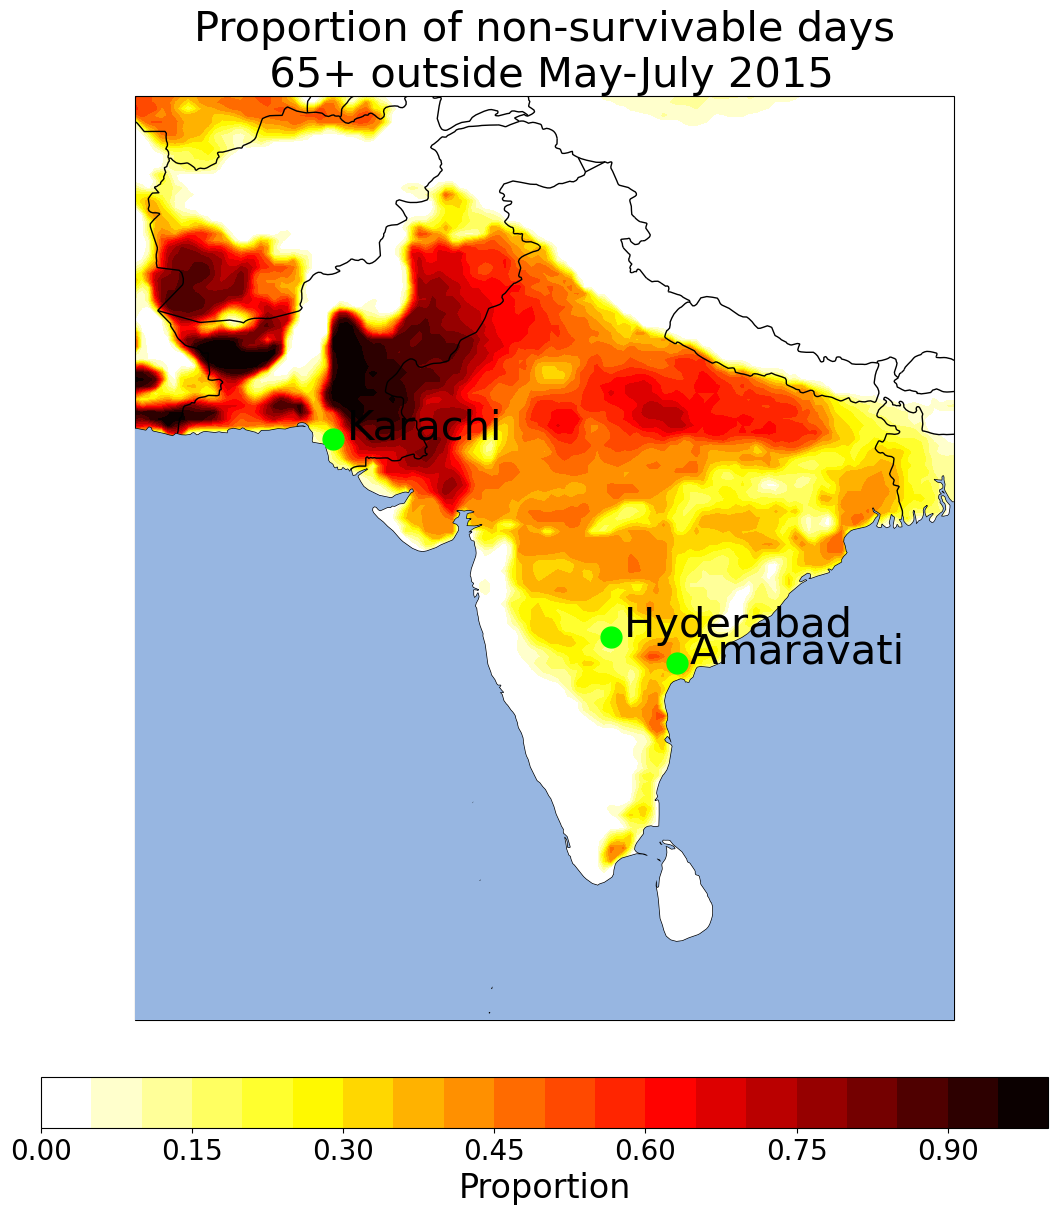

In [70]:

# Create the plot
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('hot_r')

# Add coastlines and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=100)

uneven_levels = np.arange(0,1.05,0.05)
colors = cmap(np.linspace(0, 1, len(uneven_levels) - 1))
cmap, norm = mcolors.from_levels_and_colors(uneven_levels, colors)
cmap.set_under("lightyellow")
#cmap.set_over("maroon")

# Plot the data using contourf
contour = ax.contourf(lon,lat, result2/90, transform=ccrs.PlateCarree(), cmap=cmap, levels=uneven_levels)

# Add a color bar
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, shrink=0.65)
cbar.set_label('Proportion', fontsize=24)
cbar.ax.tick_params(labelsize=20)

lon2, lat2 = 80.5, 16.5

ax.plot(lon2, lat2, marker='o', color='lime', markersize=15, transform=ccrs.PlateCarree())
ax.text(lon2 + 0.5, lat2, 'Amaravati', transform=ccrs.PlateCarree(), fontsize=30, color='black', zorder=100)

lon3, lat3 = 67.5, 25

ax.plot(lon3, lat3, marker='o', color='lime', markersize=15, transform=ccrs.PlateCarree())
ax.text(lon3 + 0.5, lat3, 'Karachi', transform=ccrs.PlateCarree(), fontsize=30, color='black', zorder=100)

lon4, lat4 = 78, 17.5

ax.plot(lon4, lat4, marker='o', color='lime', markersize=15, transform=ccrs.PlateCarree())
ax.text(lon4 + 0.5, lat4, 'Hyderabad', transform=ccrs.PlateCarree(), fontsize=30, color='black', zorder=100)


# Add a title
ax.set_title('Proportion of non-survivable days\n 65+ outside May-July 2015', fontsize=30)

# Show the plot
plt.show()